In [1]:
%matplotlib inline
import pandas as pd
import missingno as msno

In [2]:
df = pd.read_csv('https://data.boston.gov/dataset/c8b8ef8c-dd31-4e4e-bf19-af7e4e0d7f36/resource/29e74884-a777-4242-9fcc-c30aaaf3fb10/download/economic-indicators.csv', parse_dates=[['Year', 'Month']])

In [3]:
df.drop(24, inplace=True)
df.tail()

,Year_Month,logan_passengers,logan_intl_flights,hotel_occup_rate,hotel_avg_daily_rate,total_jobs,unemp_rate,labor_force_part_rate,pipeline_unit,pipeline_total_dev_cost,pipeline_sqft,pipeline_const_jobs,foreclosure_pet,foreclosure_deeds,med_housing_price,housing_sales_vol,new_housing_const_permits,new-affordable_housing_permits
19,2014-08-01,3136875,3962,0.926,247.29,0,0.062,0.616,282,160500000,403060,485.00,34,11,456000,1612,56,4
20,2014-09-01,2672685,3444,0.901,285.83,0,0.064,0.607,130,292210000,497538,883.00,33,14,462000,603,353,44
21,2014-10-01,2799342,3356,0.888,288.50,0,0.053,0.611,195,151750000,673949,458.00,37,6,450000,1651,273,14
22,2014-11-01,2422024,3055,0.797,249.72,0,0.052,0.618,298,137000000,523415,414.00,36,10,460500,420,629,69
23,2014-12-01,2420784,3179,0.620,180.79,0,0.045,0.612,178,109500000,450727,330.69,40,6,478000,524,87,84


/Users/ericmjl/anaconda/lib/python3.5/site-packages/missingno/missingno.py:250: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
  ax1.set_axis_bgcolor((1, 1, 1))


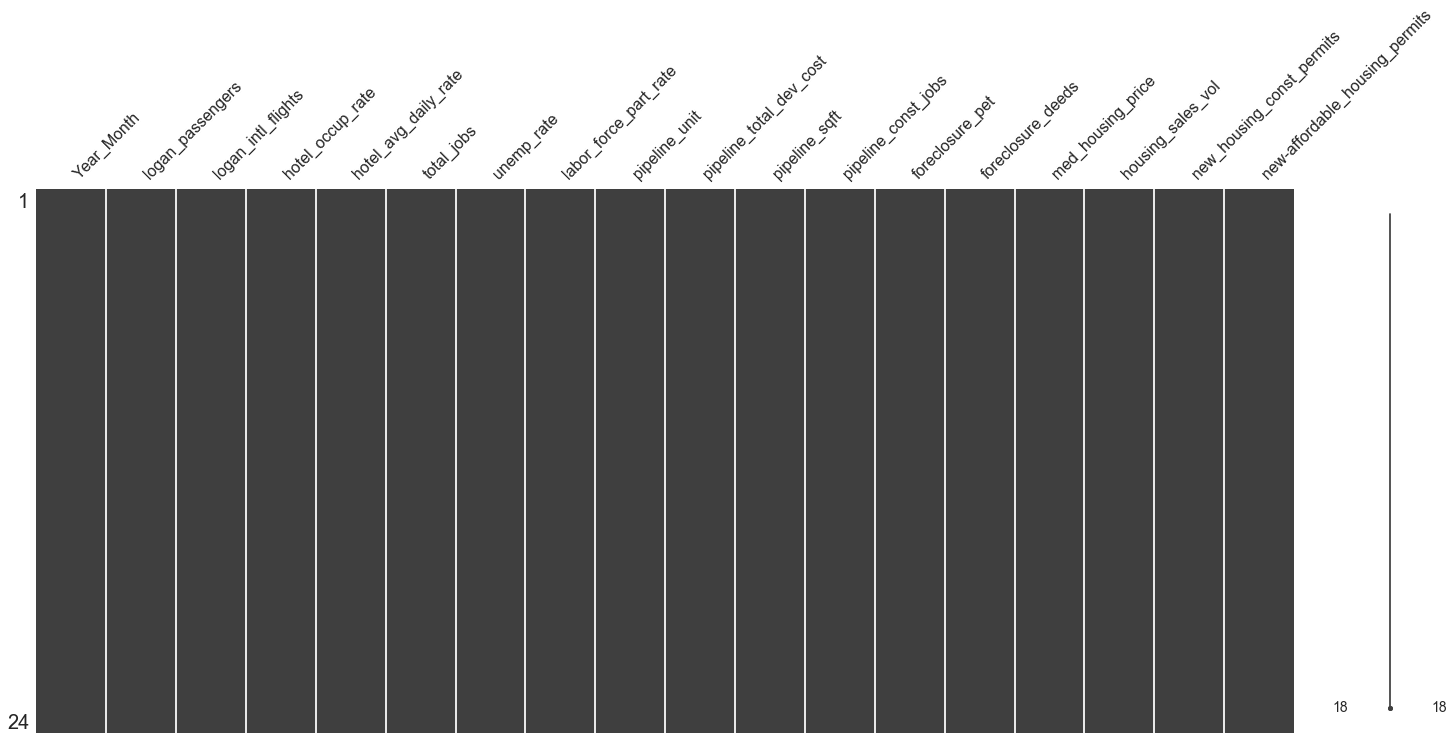

In [4]:
# Sanity check of the completeness of the data
msno.matrix(df)

In [5]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, output_file
from bokeh.charts import Area, Bar, Horizon, Line, Scatter, show

output_notebook()

Loading BokehJS ...

In [6]:
df.columns

Index(['Year_Month', 'logan_passengers', 'logan_intl_flights',
       'hotel_occup_rate', 'hotel_avg_daily_rate', 'total_jobs', 'unemp_rate',
       'labor_force_part_rate', 'pipeline_unit', 'pipeline_total_dev_cost',
       'pipeline_sqft', 'pipeline_const_jobs', 'foreclosure_pet',
       'foreclosure_deeds', 'med_housing_price', 'housing_sales_vol',
       'new_housing_const_permits', 'new-affordable_housing_permits'],
      dtype='object')

In [7]:
show(Horizon(df, x='Year_Month', y=['new_housing_const_permits', 'new-affordable_housing_permits', 'housing_sales_vol'], legend=False))

In [8]:
sel_cols = ['unemp_rate', 'labor_force_part_rate']
p = Line(data=df, x='Year_Month', y=sel_cols, plot_height=400)
show(p)